Epoch 1/100
30/30 [==============================] - 2s 21ms/step - loss: 39145963520.0000 - val_loss: 37839736832.0000
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 39141486592.0000 - val_loss: 37832228864.0000
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 39127576576.0000 - val_loss: 37810597888.0000
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 39092617216.0000 - val_loss: 37763293184.0000
Epoch 5/100
30/30 [==============================] - 0s 11ms/step - loss: 39020867584.0000 - val_loss: 37674737664.0000
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 38899380224.0000 - val_loss: 37531029504.0000
Epoch 7/100
30/30 [==============================] - 0s 13ms/step - loss: 38711812096.0000 - val_loss: 37322825728.0000
Epoch 8/100
30/30 [==============================] - 1s 19ms/step - loss: 38450573312.0000 - val_loss: 37035474944.0000
Epoch 9/100
30/30 [=======================

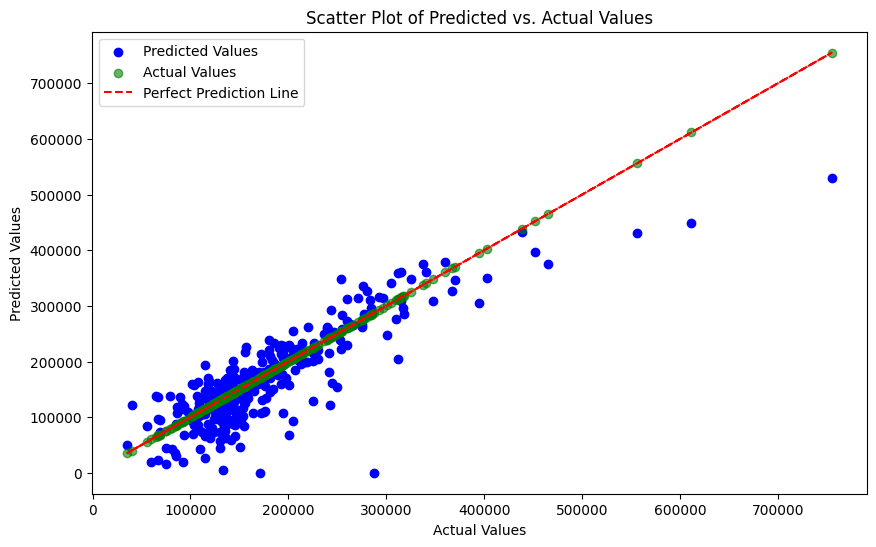

R-squared: 0.7025586158742496
Mean Absolute Error: 33725.45018883274
Root Mean Squared Error: 47764.76152732007


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Preprocessing
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
X = pd.get_dummies(X)
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Display the first 10 predictions and their corresponding actual values
for i in range(100):
    print(f'Predicted: {predictions[i][0]}, Actual: {y_test.iloc[i]}')

# Convert predictions to a 1D array for comparison
predictions = predictions.flatten()

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted Values')
plt.scatter(y_test, y_test, color='green', label='Actual Values', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.legend()

# Display the plot
plt.show()

# Calculate R-squared
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


# R-Squared
This indicates that approximately 71% of the variance in the actual house prices is explained by the model. An R² value closer to 1 indicates a better fit, while an R² value closer to 0 indicates a poor fit. A value of 0.71 is moderately good, suggesting the model is fairly effective but there is room for improvement.